In [1]:
import cv2
import os
import numpy as np
import torch
import warnings
from torch.autograd import Variable as V
from framework import MyFrame
import matplotlib.pyplot as plt
from loss import dice_bce_loss
from networks.dlinknet import DinkNet34
from networks.nllinknet import NL34_LinkNet

warnings.filterwarnings("ignore")

def plt_and_show(img):
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    
def blend_image_with_mask(image, mask, alpha=0.5):
    """
    Blends a segmentation mask onto an image with transparency and visualizes the result.
    
    :param image_path: Path to the original image.
    :param mask_path: Path to the binary segmentation mask (values 0 and 1).
    :param alpha: Transparency of the mask overlay (0.0 to 1.0).
    """
    # Load the original image
#     image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization
    
    # Load the mask and ensure it's binary (0 or 1)
#     mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = np.clip(mask, 0, 1)
    
    # Create a red overlay for the mask
    red_overlay = np.zeros_like(image)
    red_overlay[:, :, 0] = 255  # Set red channel to 255
    
    # Blend the original image with the red overlay based on the mask
    blended_image = np.where(mask[:, :, None] == 1,
                             cv2.addWeighted(image, 1 - alpha, red_overlay, alpha, 0),
                             image)
    
    # Visualize the result
#     plt.figure(figsize=(10, 10))
#     plt.imshow(blended_image)
#     plt.axis('off')
#     plt.title("Image with Mask Overlay")
#     plt.show()
# Visualize original, mask, and blended image together
    plt.figure(figsize=(15, 5))
    
    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title("Original Image")
    
    # Mask
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    plt.title("Segmentation Mask")
    
    # Blended Image
    plt.subplot(1, 3, 3)
    plt.imshow(blended_image)
    plt.axis('off')
    plt.title("Blended Image")
    
    plt.tight_layout()
    plt.show()
    


In [3]:
# evaluate-folder

def road_extraction(image_path, model_weight = "weights/nllinknet.pt"):
    img_path = "/home/datadisk/xyy/Projects/RoadExtract/samples/[PIX_SEG]_098_GID15_130854_GF2_PMS2__L1A0001389317-MSS2_ori.png"

    # nllnknet
    solver = MyFrame(NL34_LinkNet, dice_bce_loss, 2e-4)
    solver.load(model_weight)
    model_name = 'nllinknet'





    # 读取图片，分割
    img = cv2.imread(img_path)
#     print('Original image')
#     plt_and_show(img)
    img = cv2.resize(img,(1024,1024))

    img_input = img[None, ...].transpose(0, 3, 1, 2)
    img_input = V(torch.Tensor(np.array(img_input, np.float32) / 255.0 * 3.2 - 1.6).cuda())
    predict = solver.test_one_img(img_input)
    predict = np.array(predict, np.int64)

#     print('Prediction')
#     plt_and_show(predict)

    blend_image_with_mask(img, predict, alpha=0.5)



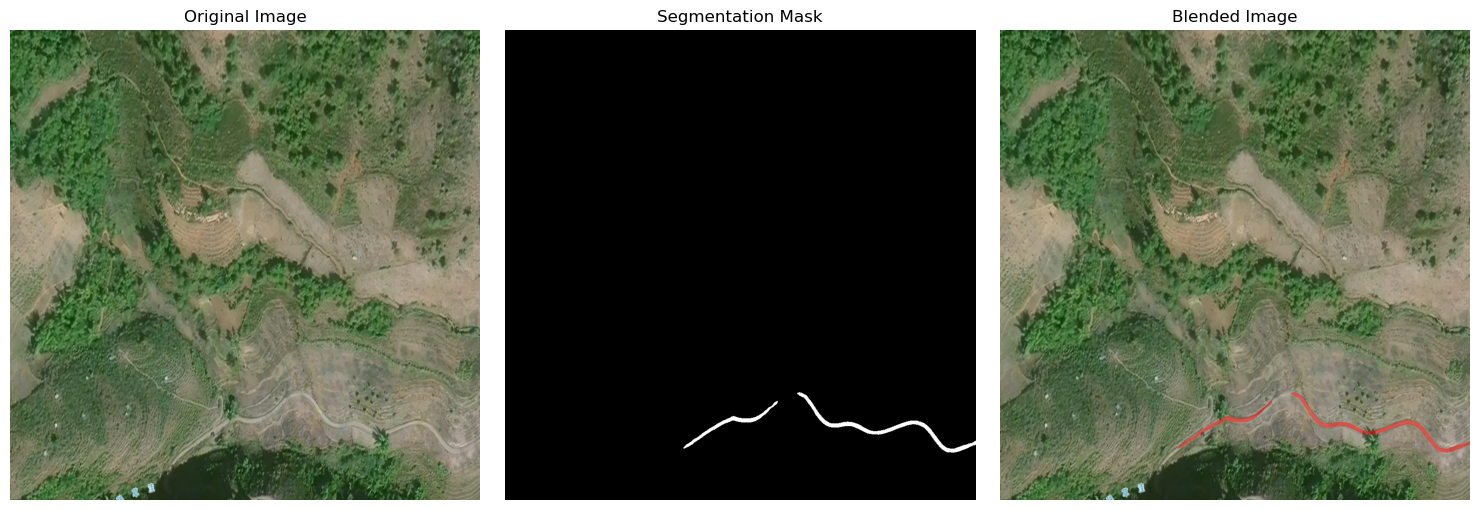

In [7]:
# evaluate-png

img_path = "/home/datadisk/xyy/Projects/testData/RoadSeg/RoadSeg4.png"
# img_path = "/home/datadisk/xyy/Projects/RoadExtract/Road-Extraction/eval_example/104_sat.jpg"

# 加载模型
solver = MyFrame(NL34_LinkNet, dice_bce_loss, 2e-4)
solver.load("weights/nllinknet.pt")


# 读取图片，分割
img = cv2.imread(img_path)
# print('Original image')
# plt_and_show(img)
img = cv2.resize(img,(1024,1024))

img_input = img[None, ...].transpose(0, 3, 1, 2)
img_input = V(torch.Tensor(np.array(img_input, np.float32) / 255.0 * 3.2 - 1.6).cuda())
predict = solver.test_one_img(img_input)
predict = np.array(predict, np.int64)

# print('Prediction')
# plt_and_show(predict)

blend_image_with_mask(img, predict, alpha=0.5)

In [33]:
predict.min()

0

In [4]:
import road_extraction as road_ex
import matplotlib.pyplot as plt

In [5]:
mask, blended_image = road_ex.road_extraction("/home/datadisk/xyy/Projects/RoadExtract/samples/[PIX_SEG]_098_GID15_130854_GF2_PMS2__L1A0001389317-MSS2_ori.png")

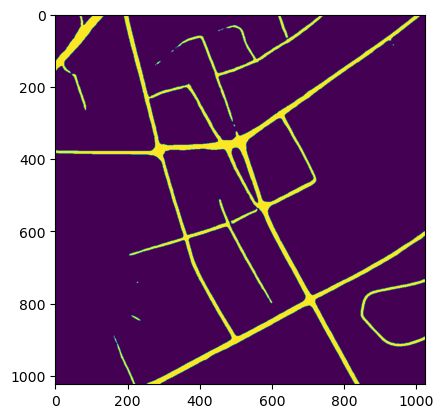

In [8]:
plt.imshow(mask)
plt.show()